# Project: Wrangling and Analyze Data

In [1]:
import tweepy
import requests
import pandas as pd
import json
import time
import math
import re
import os
from timeit import default_timer as timer
from tweepy import OAuthHandler
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
arch_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) 
with open(os.path.join(url.split('/')[-1]), mode='wb') as file: 
        file.write(response.content)
        
images = pd.read_csv('image-predictions.tsv', delimiter = '\t')

    

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = arch_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
df_list = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


In [5]:
#Lets look at a preview of the archived dataframe
arch_df.head(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [6]:
#Now lets preview the json file dataframe
json_tweets.head(5)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


Here I am checking for any missing data within the columns. 

In [7]:
arch_df.info()
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

Here, I am seeing if any of the columns have less than or more than the values they are suuposed to. For instance, the denominator column should only have 10 as a value. While the numerator column 

In [8]:
#Lets see if there may be any erraneous data in the rating_deominator column. All values should be 10. 
arch_df.describe().rating_denominator

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [9]:
#Lets take a look to see if there are any duplicated TweetIDs
print('archived', sum(arch_df.duplicated('tweet_id')))
print('predictions', sum(json_tweets.duplicated('tweet_id')))

archived 0
predictions 0


In [10]:
#Here I am comparing the tweet_id columns in both of the data frames to see if there are any missing tweet id's 

arch_df['tweet_id'].isin(json_tweets['tweet_id']).value_counts()

tweet_id
True     2354
False       2
Name: count, dtype: int64

### Quality issues

1. Erraneous Columns

2. Need to delete retweets 

3. Delete reply tweets 

4. Erraneous dog names are present such as, 'by' or 'None'. 

5. Abbreviating Source links

6. Filling in all of the none type values with 'None' for more flexibliy 

7. Some rating demonator values or more or less than 10

8. There are tweets without images. They will need to be removed. 

9. Choose the dog with the highest confidence rating. 


### Tidiness issues
1. Merge Dataframes and get rid of unneccesary columns

2. The dog stage columns (doggo,floofer,pupper,puppo) can be combined into one column. 


In [54]:
# Make copies of original pieces of data
clean_arch = arch_df.copy()
clean_json = json_tweets.copy()


### Tidy Issue #1: 

Merge Dataframes and get rid of unneccesary columns

#### Define:  

We will be merging all 3 dataframes (clean_json, images, and clean_arch) into one master data frame using the pandas merge function. This will prepare us for cleaning the data later on.

#### Code

In [87]:
master_df = clean_json.copy()
master_df = pd.merge(clean_arch, images, how = 'left', on = ['tweet_id'] )
master_df = pd.merge(master_df, clean_json, how = 'left', on = ['tweet_id'] )



Test

In [88]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Issue #2:  

We need to combine the 4 dog stages (doggo, floofer, pupper, puppo) into one column. 

#### Define

We will be combining the 4 dog stage columns into one column to make the data tidier. We will be using adding the dog_stage column and adding the values to the column and then dropping the extra columns. 

#### Code

In [89]:
#Here we are confirming the value in the columns
print(master_df.doggo.value_counts())
print(master_df.floofer.value_counts())
print(master_df.pupper.value_counts())
print(master_df.puppo.value_counts())


doggo
doggo    97
Name: count, dtype: int64
floofer
floofer    10
Name: count, dtype: int64
pupper
pupper    257
Name: count, dtype: int64
puppo
puppo    30
Name: count, dtype: int64


In [90]:
#create a new column
master_df['dog_stage'] = master_df['doggo'].astype(str) + master_df["floofer"].astype(str) + master_df["pupper"].astype(str) + master_df["puppo"].astype(str)
#Testing
master_df.dog_stage.value_counts()


dog_stage
nannannannan          1976
nannanpuppernan        245
doggonannannan          83
nannannanpuppo          29
doggonanpuppernan       12
nanfloofernannan         9
doggonannanpuppo         1
doggofloofernannan       1
Name: count, dtype: int64

In [91]:
# rename dog_stage names
master_df.loc[master_df.dog_stage=='nannannanpuppo','dog_stage']='Puppo'
master_df.loc[master_df.dog_stage=='nannanpuppernan','dog_stage']='Pupper'
master_df.loc[master_df.dog_stage=='nanfloofernannan','dog_stage']='Floofer'
master_df.loc[master_df.dog_stage=='doggonannannan','dog_stage']='Doggo'
master_df.loc[master_df.dog_stage=='nannannannan','dog_stage']='None'
master_df.loc[master_df.dog_stage=='doggonanpuppernan','dog_stage']='Unknown'
master_df.loc[master_df.dog_stage=='doggonannanpuppo','dog_stage']='Unknown'
master_df.loc[master_df.dog_stage=='doggofloofernannan','dog_stage']='Unknown'

master_df['dog_stage'].replace('nannannanpuppo','Puppo')




#replace blank cells with unknown
master_df.dog_stage.replace('','Unknown', inplace=True)
master_df.dog_stage.value_counts()



dog_stage
None       1976
Pupper      245
Doggo        83
Puppo        29
Unknown      14
Floofer       9
Name: count, dtype: int64

In [92]:
# Drop extra columns 
master_df.drop(['doggo','pupper','floofer','puppo'], axis=1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111.0,41.0,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311.0,147.0,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,128.0,47.0,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,132.0,48.0,None


#### Test

In [93]:
master_df.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'dog_stage']

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [94]:
#2 Delete duplicated tweet_id (retweets)
master_df = master_df[pd.isnull(master_df.retweeted_status_id)]
#3 Delete tweet replies
master_df = master_df[master_df['in_reply_to_status_id'].isna()]
#4 Delete tweets without pictures
master_df = master_df.dropna(subset = ['jpg_url'])
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1447 non-null   object 
 13  doggo                       73 non-nul

In [95]:
# Create conditions 
conditions = [(master_df.p1_dog == True),(master_df.p2_dog == True),(master_df.p3_dog == True)]

# Create the Choice order
breed_choice = [master_df['p1'],master_df['p2'],master_df['p3']]

# Create choice order based on the confidence interval
choices_confidence = [master_df['p1_conf'],master_df['p2_conf'],master_df['p3_conf']]

# Select breed based on first successful condition
master_df['breed'] = np.select(conditions, breed_choice, default = 'none')

# select predicted confidence level based on first successful condition
master_df['confidence'] = np.max(choices_confidence)

#test
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,39467.0,8853.0,None,none,1.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,33819.0,6514.0,None,Chihuahua,1.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,None,Chihuahua,1.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,42908.0,8964.0,None,Labrador_retriever,1.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,None,basset,1.0


In [96]:
# Delete irrelevant columns
master_df.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf','in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','floofer','pupper','puppo'], axis = 1, inplace = True)



In [97]:
#5 Delete irrelevant columns 
master_df.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'breed',
 'confidence']

In [98]:
#6 Renameing source links

#Creating a dictionary that will hold the abbreviated text
text_value = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'
}

# Creating funcation that will replace the keys with values
def renaming_source(df):
    if df['source'] in text_value.keys():
        abbrev = text_value[df['source']]
        return abbrev
    else:
        return df['source']
    
# Calling our function   
master_df.source = master_df.apply(renaming_source, axis=1)
master_df.source.value_counts()

source
Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: count, dtype: int64

In [99]:
#1 Replace all of the nonetype data entries with "None"
master_df.fillna('None', inplace = True)
#Change favorite count data to whole integer
master_df.favorite_count = master_df.favorite_count.astype(int)
master_df.retweet_count = master_df.retweet_count.astype(int)

#names with all lower case help filter out the bad values
names_mask = master_df.name.str.contains('^[a-z]', regex = True)

master_df[names_mask].name.value_counts().sort_index()



name
a               55
actually         1
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
light            1
my               1
not              1
officially       1
one              4
quite            3
space            1
such             1
the              7
this             1
unacceptable     1
very             4
Name: count, dtype: int64

In [100]:
#Lets replace these with the "None" Value. 
master_df.loc[names_mask, 'name'] = "Unknown"


In [109]:
#Change all rating numerators to 10. 
master_df['rating_denominator'] = 10

In [114]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,favorite_count,retweet_count,confidence
count,1.971000e+03,1971.000000,1971.0,1971.000000,1971.000000,1971.000000,1971.0
mean,7.360418e+17,12.223237,10.0,1.201928,8949.106545,2784.449518,1.0
std,6.752810e+16,41.634034,0.0,0.559020,12267.799790,4697.662893,0.0
min,6.660209e+17,0.000000,10.0,1.000000,81.000000,16.000000,1.0
25%,6.758656e+17,10.000000,10.0,1.000000,1997.000000,628.500000,1.0
50%,7.088343e+17,11.000000,10.0,1.000000,4147.000000,1367.000000,1.0
75%,7.880951e+17,12.000000,10.0,1.000000,11402.500000,3239.000000,1.0
max,8.924206e+17,1776.000000,10.0,4.000000,132810.000000,79515.000000,1.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [115]:
master_df.to_csv('twitter_archived_master.csv', encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

1. According to the data we rate dogs rates golden retrieve more than any other breed. 
2. Which UI source is the most popular? 
3. There is a strong correlation in the number of retweets and favorites performed by users. 


# Top Favorited Pups

In [116]:
master_df.query('dog_stage == None').value_counts()
master_df.dog_stage.replace('', 'Unknown', inplace = True)
labelz = ['Pupper','Doggo','Puppo','Unknown','Floofer']
dog_stage_number = master_df.dog_stage.value_counts().head(6)
print('Most Mentioned Dog Stages: Pupper')
print(dog_stage_number)

Most Mentioned Dog Stages: Pupper
dog_stage
None       1668
Pupper      201
Doggo        63
Puppo        22
Unknown      10
Floofer       7
Name: count, dtype: int64


# Top Rated Dog

In [117]:
top_rated_dog = master_df.groupby(['dog_stage']).rating_numerator.sum().sort_values(ascending=False)
print('Top Rated Pup')
print(top_rated_dog)

Top Rated Pup
dog_stage
None       20729
Pupper      2154
Doggo        749
Puppo        264
Unknown      112
Floofer       84
Name: rating_numerator, dtype: int64


/var/folders/cq/5y34sq656r7dhnw_zgw784h40000gn/T/ipykernel_1872/3250060781.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(fav_count, retweet_count, c = colors, alpha = 0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


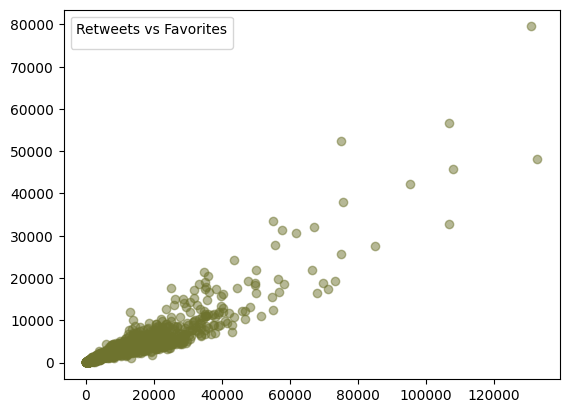

In [118]:
fav_count = master_df.favorite_count
retweet_count = master_df.retweet_count
N = 4
# 0 to 15 point ra
colors = np.random.rand(N)
plt.scatter(fav_count, retweet_count, c = colors, alpha = 0.5)

plt.legend(title = 'Retweets vs Favorites')

# Most Common Dog Name

In [119]:
common_dog_name = master_df.name.value_counts().head(4)
common_dog_name = common_dog_name.drop('None')
print(common_dog_name)

name
Unknown    98
Charlie    11
Lucy       10
Name: count, dtype: int64


## Visualization

['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua']
Most Common Dog Breeds:  Golden Retriever


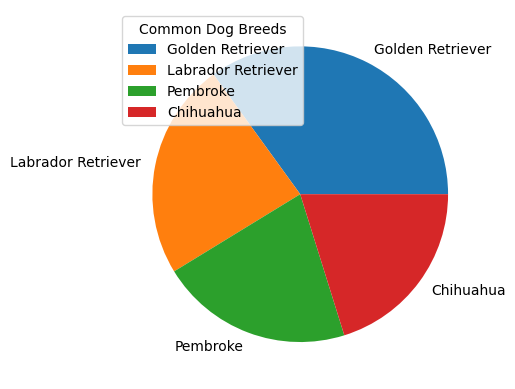

In [123]:
#According to the data we rate dogs rates golden retrieve more than any other breed. 

breed_counts = master_df.breed.value_counts().head(5)
labels = ['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua']
print(labels)
most_breeds = breed_counts.drop(index = 'none')
plt.pie(most_breeds, labels = labels)
plt.legend(loc='upper left', title = 'Common Dog Breeds')
print('Most Common Dog Breeds: ', 'Golden Retriever')

Which UI Source is the most popular? 

In [126]:
#The owners of the account use the mobile app far more than any other platform of twitter. 
master_df['source'].value_counts()


source
Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: count, dtype: int64